<a href="https://colab.research.google.com/github/babupallam/Supervised-Learning-Classification-Algorithms/blob/main/01_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression
    - A statistical method used for binary classification problems
    - Despite its name, logistic regression is a classification algorithm, not a regression algorithm.

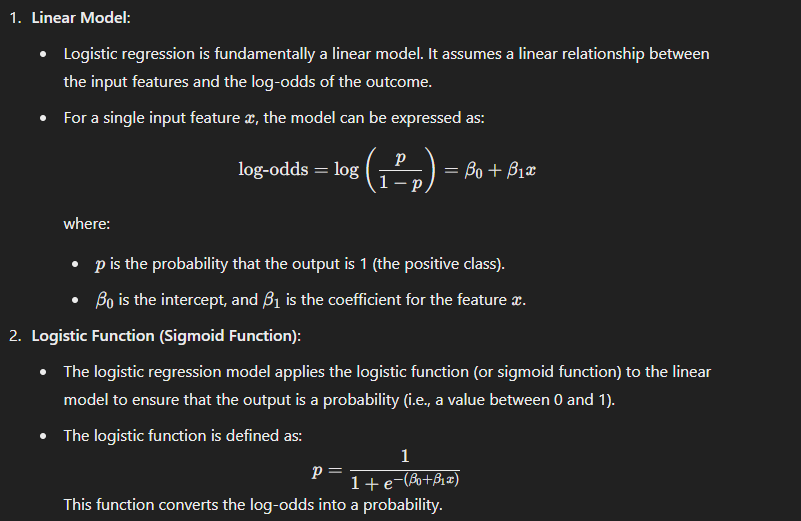

How the decsion is being made in this algorithms is based on the 'p' value generated above.

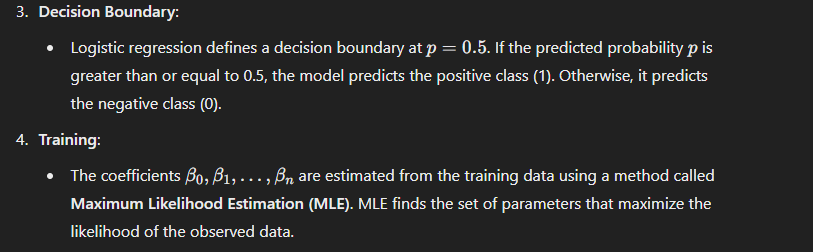

To make it usable for multi featured inputs, the equation can be extended.

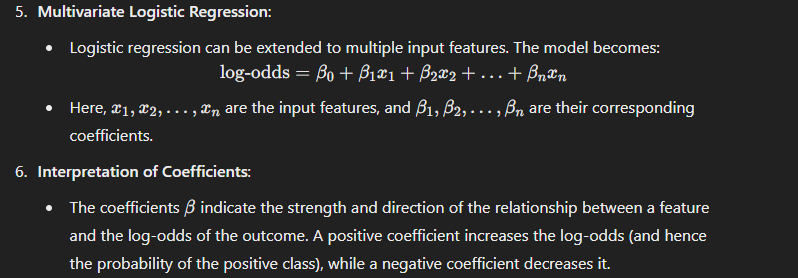



---



---


# Demo of Algorithm (using scikit learn and pandas)

---



In [ ]:
!pip install scikit-learn pandas


In [ ]:
#import libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris


In [ ]:
#load dataset

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# We will convert this into a binary classification problem
# Let's classify only whether the flower is Iris-Setosa or not
df['target'] = df['target'].apply(lambda x: 1 if x == 0 else 0)

# Display the first few rows of the dataset
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [ ]:
# Split the Data into Training and Testing Sets
# Define features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Train the Logistic Regression Model

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
# Make Predictions and Evaluate the Model

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        19

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
[[26  0]
 [ 0 19]]


## Interpret the Results
Look at the output to understand how well your model has performed.
  - Accuracy: This tells you the percentage of correct predictions made by the model.
  - Classification Report: This includes precision, recall, and F1-score, which are helpful for understanding the performance on each class.
  - Confusion Matrix: This shows the true positives, false positives, true negatives, and false negatives.

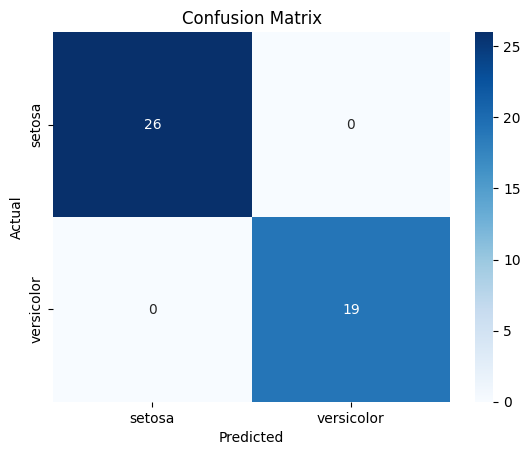

In [ ]:
# visualize the result

import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names[:2], yticklabels=iris.target_names[:2])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


# Demo of Algorithm (using tensorflow)

---

In [ ]:
!pip install tensorflow pandas


In [ ]:
# import libraries

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Convert this into a binary classification problem (Iris-Setosa or not)
df['target'] = df['target'].apply(lambda x: 1 if x == 0 else 0)

# Display the first few rows of the dataset
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [ ]:
# Split the Data into Training and Testing Sets
# Define features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [ ]:
#  Build and Compile the Logistic Regression Model

# In TensorFlow, a Logistic Regression model can be implemented using a single dense layer with a sigmoid activation function.


# Build the Logistic Regression model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(X_train.shape[1],), activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5 (20.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# train the model

# Train the model
model.fit(X_train, y_train, epochs=100, verbose=1)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.2587 - loss: 6.1646
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3108 - loss: 5.6508 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2660 - loss: 6.0158 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3233 - loss: 5.4410 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2650 - loss: 5.9055  
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2941 - loss: 5.5925 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2868 - loss: 5.6347 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3129 - loss: 5.3126  
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3087 - loss: 5.3698 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2618 - loss: 5.6879  
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2796 - loss: 5.4837 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2889

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4065 - loss: 1.4492  
Test Accuracy: 42.22%


In [ ]:
# Make predictions on the test data
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Accuracy: 42.22%
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.42      1.00      0.59        19

    accuracy                           0.42        45
   macro avg       0.21      0.50      0.30        45
weighted avg       0.18      0.42      0.25        45

Confusion Matrix:
[[ 0 26]
 [ 0 19]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


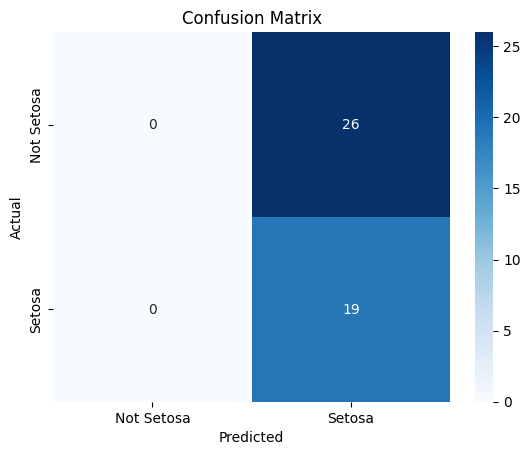

In [ ]:
# visualize the result

import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Setosa', 'Setosa'], yticklabels=['Not Setosa', 'Setosa'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()




---



---



# Observations

## comparison of scikit learn code vs tensorflow code

 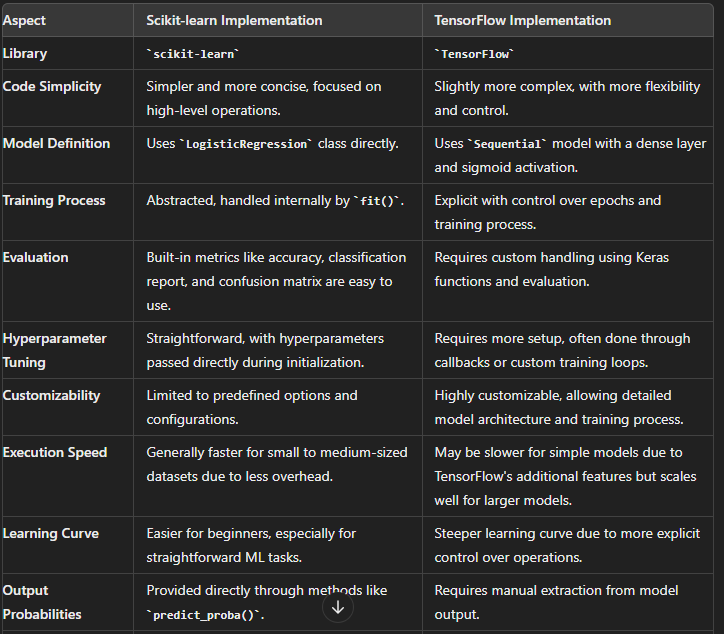

 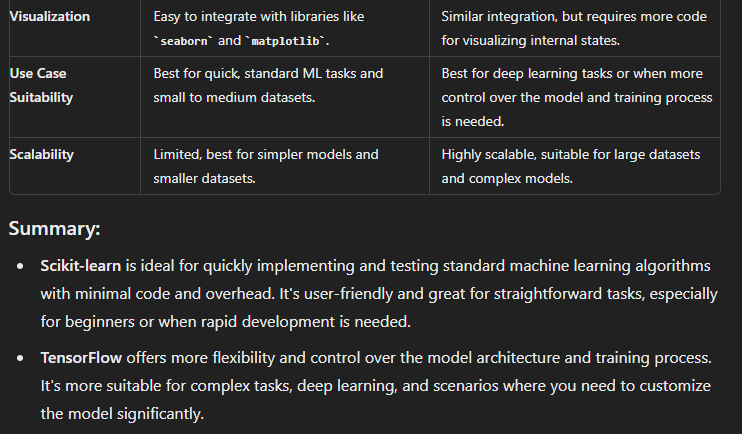

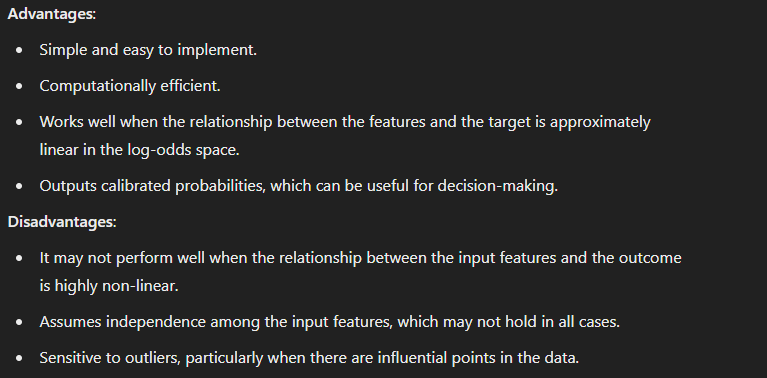



---



---



# Applications of Logistic Regression





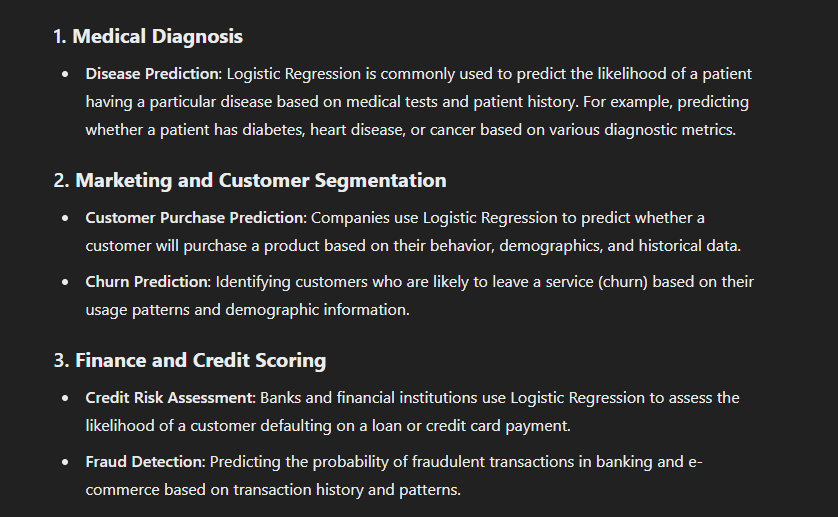


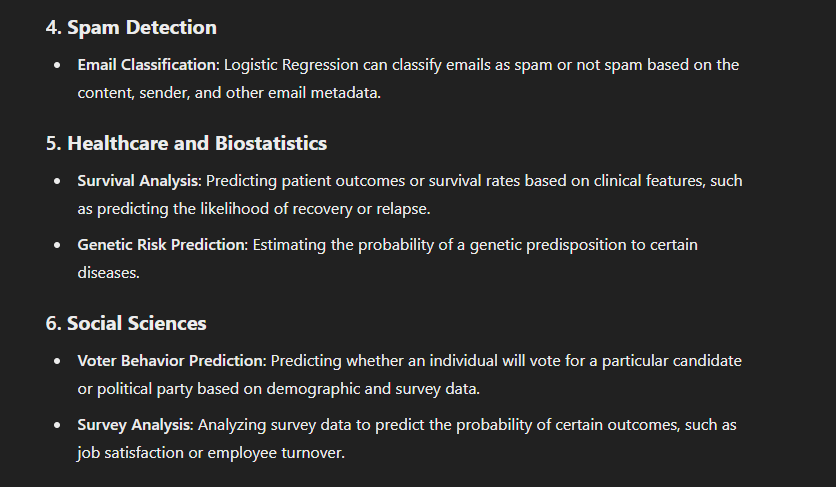


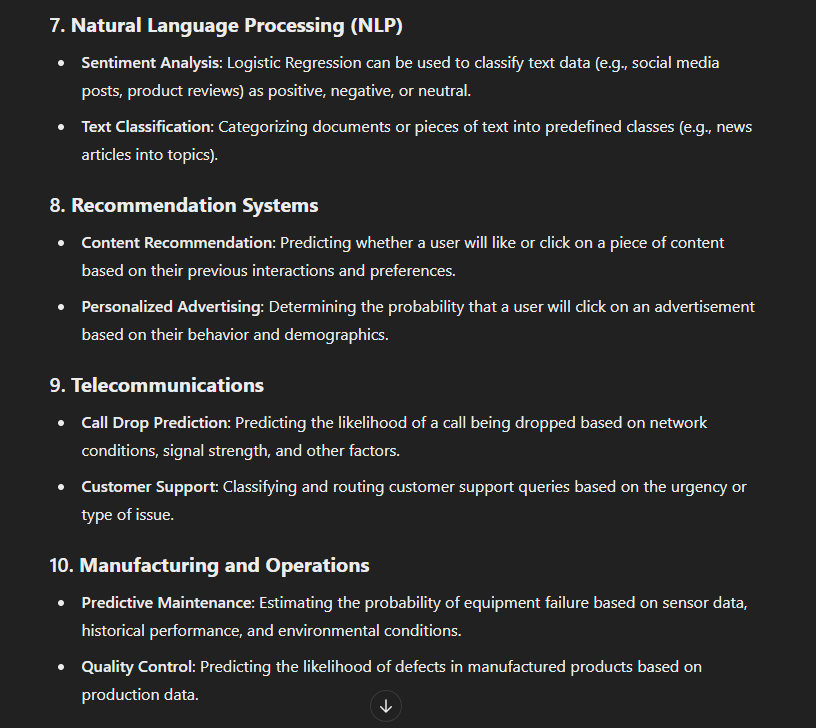


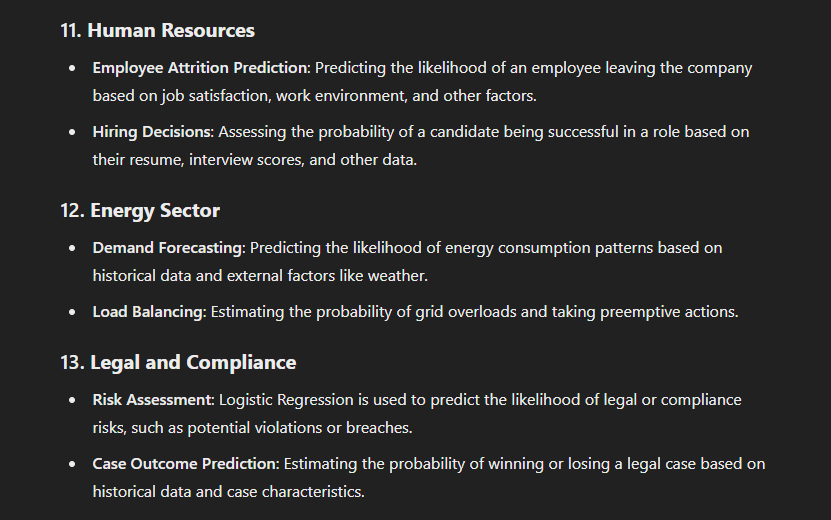